# PROGETTO INTELLIGENZA ARTIFICIALE
> Stefani Tommaso - Broccoli Gabriele

---
FASE 0 - Import
---
---

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from xgboost import XGBRegressor
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import xlrd
import openpyxl
import warnings

---
FASE 1 - Esplorazione dati
----
---

In [2]:
#Carica il dataset
filepath = '/content/sample_data/Emissioni 10.000 ab.xls'
df = pd.read_excel(filepath)

#creo una copia del dataset per non lavorare direttamente e modificare il dataset
df1 = df.copy()

#stampo gli header del dataset
df1.head(5)

,"Fattori di emissione medi da traffico per settore, combustibile e tipo legislativo in Lombardia nel 2014 - public review (Fonte: INEMAR ARPA LOMBARDIA)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Settore,Combustibile,Tipo legislativo,Periodo,Consumo specifico,SO2,NOx,COV,CH4,CO,CO2,N2O,NH3,PM2.5,PM10,PTS
2,NaN,NaN,NaN,NaN,g/km,mg/km,mg/km,mg/km,mg/km,mg/km,g/km,mg/km,mg/km,mg/km,mg/km,mg/km
3,Automobili,benzina verde,Euro 0,< 01/01/93,61.632435,1.204133,2084.048393,1620.773665,122.076129,12362.960114,190.028009,8.179762,1.999326,15.565311,27.0227,40.058423
4,Automobili,benzina verde,Euro 1 - 91/441/EEC,da 01/01/1993 a 31/12/1996,59.253481,1.140755,711.703829,588.338866,25.705812,5830.90428,182.673617,15.460622,102.897094,15.733231,27.190619,40.226342


In [3]:
#estrae header e dati impostando i valori reali
header = df1.iloc[1]  #prende la seconda riga del dataset e la imposto come header
data_df = df1[3:64]    #seleziono le righe dal 3 al 63 inclusa
data_df.columns = header  #imposto l'header del dataset con i valori estratti dalla riga 2

data_df.reset_index(drop=True, inplace=True)  #reimposta l'indice del datadet e lo aggiorna
data_df.head(5)  #stampo per controllare di aver impostato correttamente i nuovi header

1,Settore,Combustibile,Tipo legislativo,Periodo,Consumo specifico,SO2,NOx,COV,CH4,CO,CO2,N2O,NH3,PM2.5,PM10,PTS
0,Automobili,benzina verde,Euro 0,< 01/01/93,61.632435,1.204133,2084.048393,1620.773665,122.076129,12362.960114,190.028009,8.179762,1.999326,15.565311,27.0227,40.058423
1,Automobili,benzina verde,Euro 1 - 91/441/EEC,da 01/01/1993 a 31/12/1996,59.253481,1.140755,711.703829,588.338866,25.705812,5830.90428,182.673617,15.460622,102.897094,15.733231,27.190619,40.226342
2,Automobili,benzina verde,Euro 2 - 94/12/EC,da 01/01/1997 a 31/12/2000,56.54658,1.125293,358.630231,157.147263,35.396946,2068.050436,174.355865,7.945214,148.842319,15.732021,27.189409,40.225132
3,Automobili,benzina verde,Euro 3 - 98/69/EC Stage 2000,da 01/01/2001 a 31/12/2005,57.539716,1.147106,79.716127,15.488732,24.151833,1131.241819,177.412878,2.582156,23.055528,14.404072,25.86146,38.897183
4,Automobili,benzina verde,Euro 4 - 98/69/EC Stage 2005,da 01/01/2006 a 31/12/2010,59.429358,1.187123,50.254159,10.406638,17.541094,362.63487,182.827675,1.945418,23.549106,14.400368,25.857756,38.893479


In [4]:
#controllo se ci sono valori nulli
data_df.isna().sum()

1
Settore              1
Combustibile         1
Tipo legislativo     1
Periodo              2
Consumo specifico    1
SO2                  1
NOx                  1
COV                  1
CH4                  1
CO                   1
CO2                  1
N2O                  1
NH3                  1
PM2.5                1
PM10                 1
PTS                  1
dtype: int64

In [5]:
#rimuovo valori mancanti dataset
data_df.dropna(inplace=True) #in-place = senza necessità di assegnare il risultato a una nuova variabile
#ricontrollo che non ci siano altri valori nulli
data_df.isna().sum()

<ipython-input-5-43921f8d8b89>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df.dropna(inplace=True) #in-place = senza necessità di assegnare il risultato a una nuova variabile


1
Settore              0
Combustibile         0
Tipo legislativo     0
Periodo              0
Consumo specifico    0
SO2                  0
NOx                  0
COV                  0
CH4                  0
CO                   0
CO2                  0
N2O                  0
NH3                  0
PM2.5                0
PM10                 0
PTS                  0
dtype: int64

In [6]:
#descrivo il dataset stampando: conteggio, media, deviazione standard,
#valore minimo, i quartili e valore massimo per ciascuna colonna numerica.
data_df.describe()

1,Settore,Combustibile,Tipo legislativo,Periodo,Consumo specifico,SO2,NOx,COV,CH4,CO,CO2,N2O,NH3,PM2.5,PM10,PTS
count,59,59,59,59,59.000000,59.0,59.000000,59.000000,59.000000,59.0,59.000000,59.0,59.000000,59.000000,59.0000,59.000000
unique,5,4,25,22,59.000000,43.0,59.000000,59.000000,59.000000,58.0,59.000000,58.0,59.000000,59.000000,59.0000,59.000000
top,Automobili,benzina verde,Euro 3 - 98/69/EC Stage 2000,da 01/01/2001 a 31/12/2005,61.632435,0.0,2084.048393,1620.773665,122.076129,1000.0,190.028009,0.0,1.999326,15.565311,27.0227,40.058423
freq,21,21,6,6,1.000000,17.0,1.000000,1.000000,1.000000,2.0,1.000000,2.0,1.000000,1.000000,1.0000,1.000000


In [7]:
#controllo che i tipi delle variabili siano effettivamente i valori effettivi
data_df.dtypes

1
Settore              object
Combustibile         object
Tipo legislativo     object
Periodo              object
Consumo specifico    object
SO2                  object
NOx                  object
COV                  object
CH4                  object
CO                   object
CO2                  object
N2O                  object
NH3                  object
PM2.5                object
PM10                 object
PTS                  object
dtype: object

In [8]:
#alcuni valori che dovrebbero essere numerici sono trattati come stringhe, quindi li devo convertire

#parametri di cui devo cambiare il tipo da object a float
parametri = header[4:] # ['Consumo specifico', 'SO2', 'NOx', 'COV', 'CH4', 'CO', 'CO2', 'N2O', 'NH3', 'PM2.5', 'PM10', 'PTS']
#converto le colonne da tipo object a tipo numerico
data_df[parametri] = data_df[parametri].apply(pd.to_numeric, errors='coerce')

#rimuovo i valori nulli
data_df.dropna(inplace=True)

#controllo che la sostituzione dei tipi sia avvenuta correttamente
data_df.dtypes

<ipython-input-8-14bd146378ba>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df[parametri] = data_df[parametri].apply(pd.to_numeric, errors='coerce')
<ipython-input-8-14bd146378ba>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df.dropna(inplace=True)


1
Settore               object
Combustibile          object
Tipo legislativo      object
Periodo               object
Consumo specifico    float64
SO2                  float64
NOx                  float64
COV                  float64
CH4                  float64
CO                   float64
CO2                  float64
N2O                  float64
NH3                  float64
PM2.5                float64
PM10                 float64
PTS                  float64
dtype: object

In [9]:
#controllo la dimensione del dataset
#il primo elemento rappresenta il numero di righe mentre il secondo rappresenta il numero di colonne
data_df.shape

(59, 16)

In [10]:
#stampo le prime righe del dataset per controllare che tutti i passi precedenti siano avvenuti tutti con successo
data_df.head(5)

1,Settore,Combustibile,Tipo legislativo,Periodo,Consumo specifico,SO2,NOx,COV,CH4,CO,CO2,N2O,NH3,PM2.5,PM10,PTS
0,Automobili,benzina verde,Euro 0,< 01/01/93,61.632435,1.204133,2084.048393,1620.773665,122.076129,12362.960114,190.028009,8.179762,1.999326,15.565311,27.022700,40.058423
1,Automobili,benzina verde,Euro 1 - 91/441/EEC,da 01/01/1993 a 31/12/1996,59.253481,1.140755,711.703829,588.338866,25.705812,5830.904280,182.673617,15.460622,102.897094,15.733231,27.190619,40.226342
2,Automobili,benzina verde,Euro 2 - 94/12/EC,da 01/01/1997 a 31/12/2000,56.546580,1.125293,358.630231,157.147263,35.396946,2068.050436,174.355865,7.945214,148.842319,15.732021,27.189409,40.225132
3,Automobili,benzina verde,Euro 3 - 98/69/EC Stage 2000,da 01/01/2001 a 31/12/2005,57.539716,1.147106,79.716127,15.488732,24.151833,1131.241819,177.412878,2.582156,23.055528,14.404072,25.861460,38.897183
4,Automobili,benzina verde,Euro 4 - 98/69/EC Stage 2005,da 01/01/2006 a 31/12/2010,59.429358,1.187123,50.254159,10.406638,17.541094,362.634870,182.827675,1.945418,23.549106,14.400368,25.857756,38.893479


In [11]:
#descrivo il dataset stampando: conteggio, media, deviazione standard,
#valore minimo, i quartili e valore massimo per ciascuna colonna numerica
#per controllare che le modifiche precedenti siano avvenute con successo
data_df.describe()

1,Consumo specifico,SO2,NOx,COV,CH4,CO,CO2,N2O,NH3,PM2.5,PM10,PTS
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,99.461188,1.171560,1516.237525,561.229143,152.343810,2980.690300,293.736618,8.472356,18.396493,60.881546,80.395267,101.082685
std,100.335806,1.199654,2776.098837,1304.380565,611.421986,4770.887005,279.528161,10.940182,36.309331,78.868290,86.434470,97.097480
min,20.000000,0.000000,19.393293,0.041421,0.517091,0.402021,63.596840,0.000000,0.960116,11.332775,17.063931,22.615017
25%,56.933987,0.000000,97.213575,20.305304,11.518623,459.598859,168.294097,1.619086,1.318899,15.731717,27.189106,40.219736
50%,61.422102,1.116467,442.365268,61.775082,24.090000,1151.767616,182.673617,5.072397,3.915500,21.957718,38.930245,55.485585
75%,90.541693,1.565810,1261.834423,481.574674,58.921366,3480.601025,276.816263,8.443480,14.051390,66.306159,107.454895,129.660708
max,515.000001,4.244201,15000.000036,8181.000003,4500.000009,23201.747257,1421.740102,48.557862,160.148587,379.759751,426.945340,479.874084


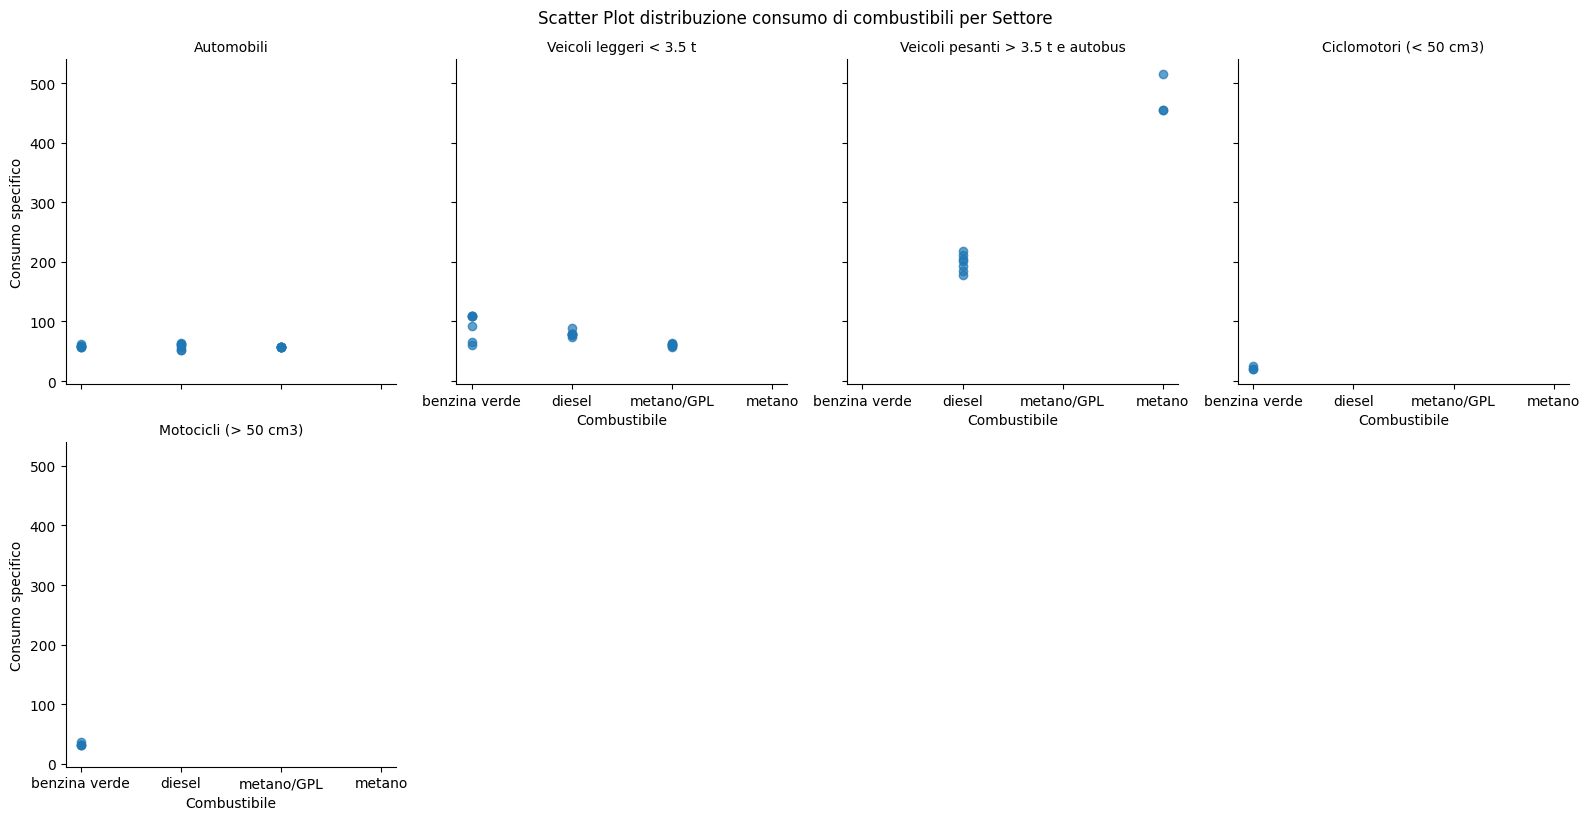

In [12]:
#creo una griglia per rappresentare un grafico per ciascun settore
g = sns.FacetGrid(data_df, col="Settore", col_wrap=4, height=4)

#mappatura della griglia per mettere un grafico per ogni cella della griglia
g.map(plt.scatter, "Combustibile", "Consumo specifico", alpha=0.7)

#imposto dei titoli per ogni cella con il nome del settore corrispondente
g.set_titles(col_template="{col_name}")

#aggiungo un titolo alla griglia
g.fig.suptitle("Scatter Plot distribuzione consumo di combustibili per Settore", y=1.02)

#visualizzo la griglia con tutti i grafici al suo interno
plt.show()

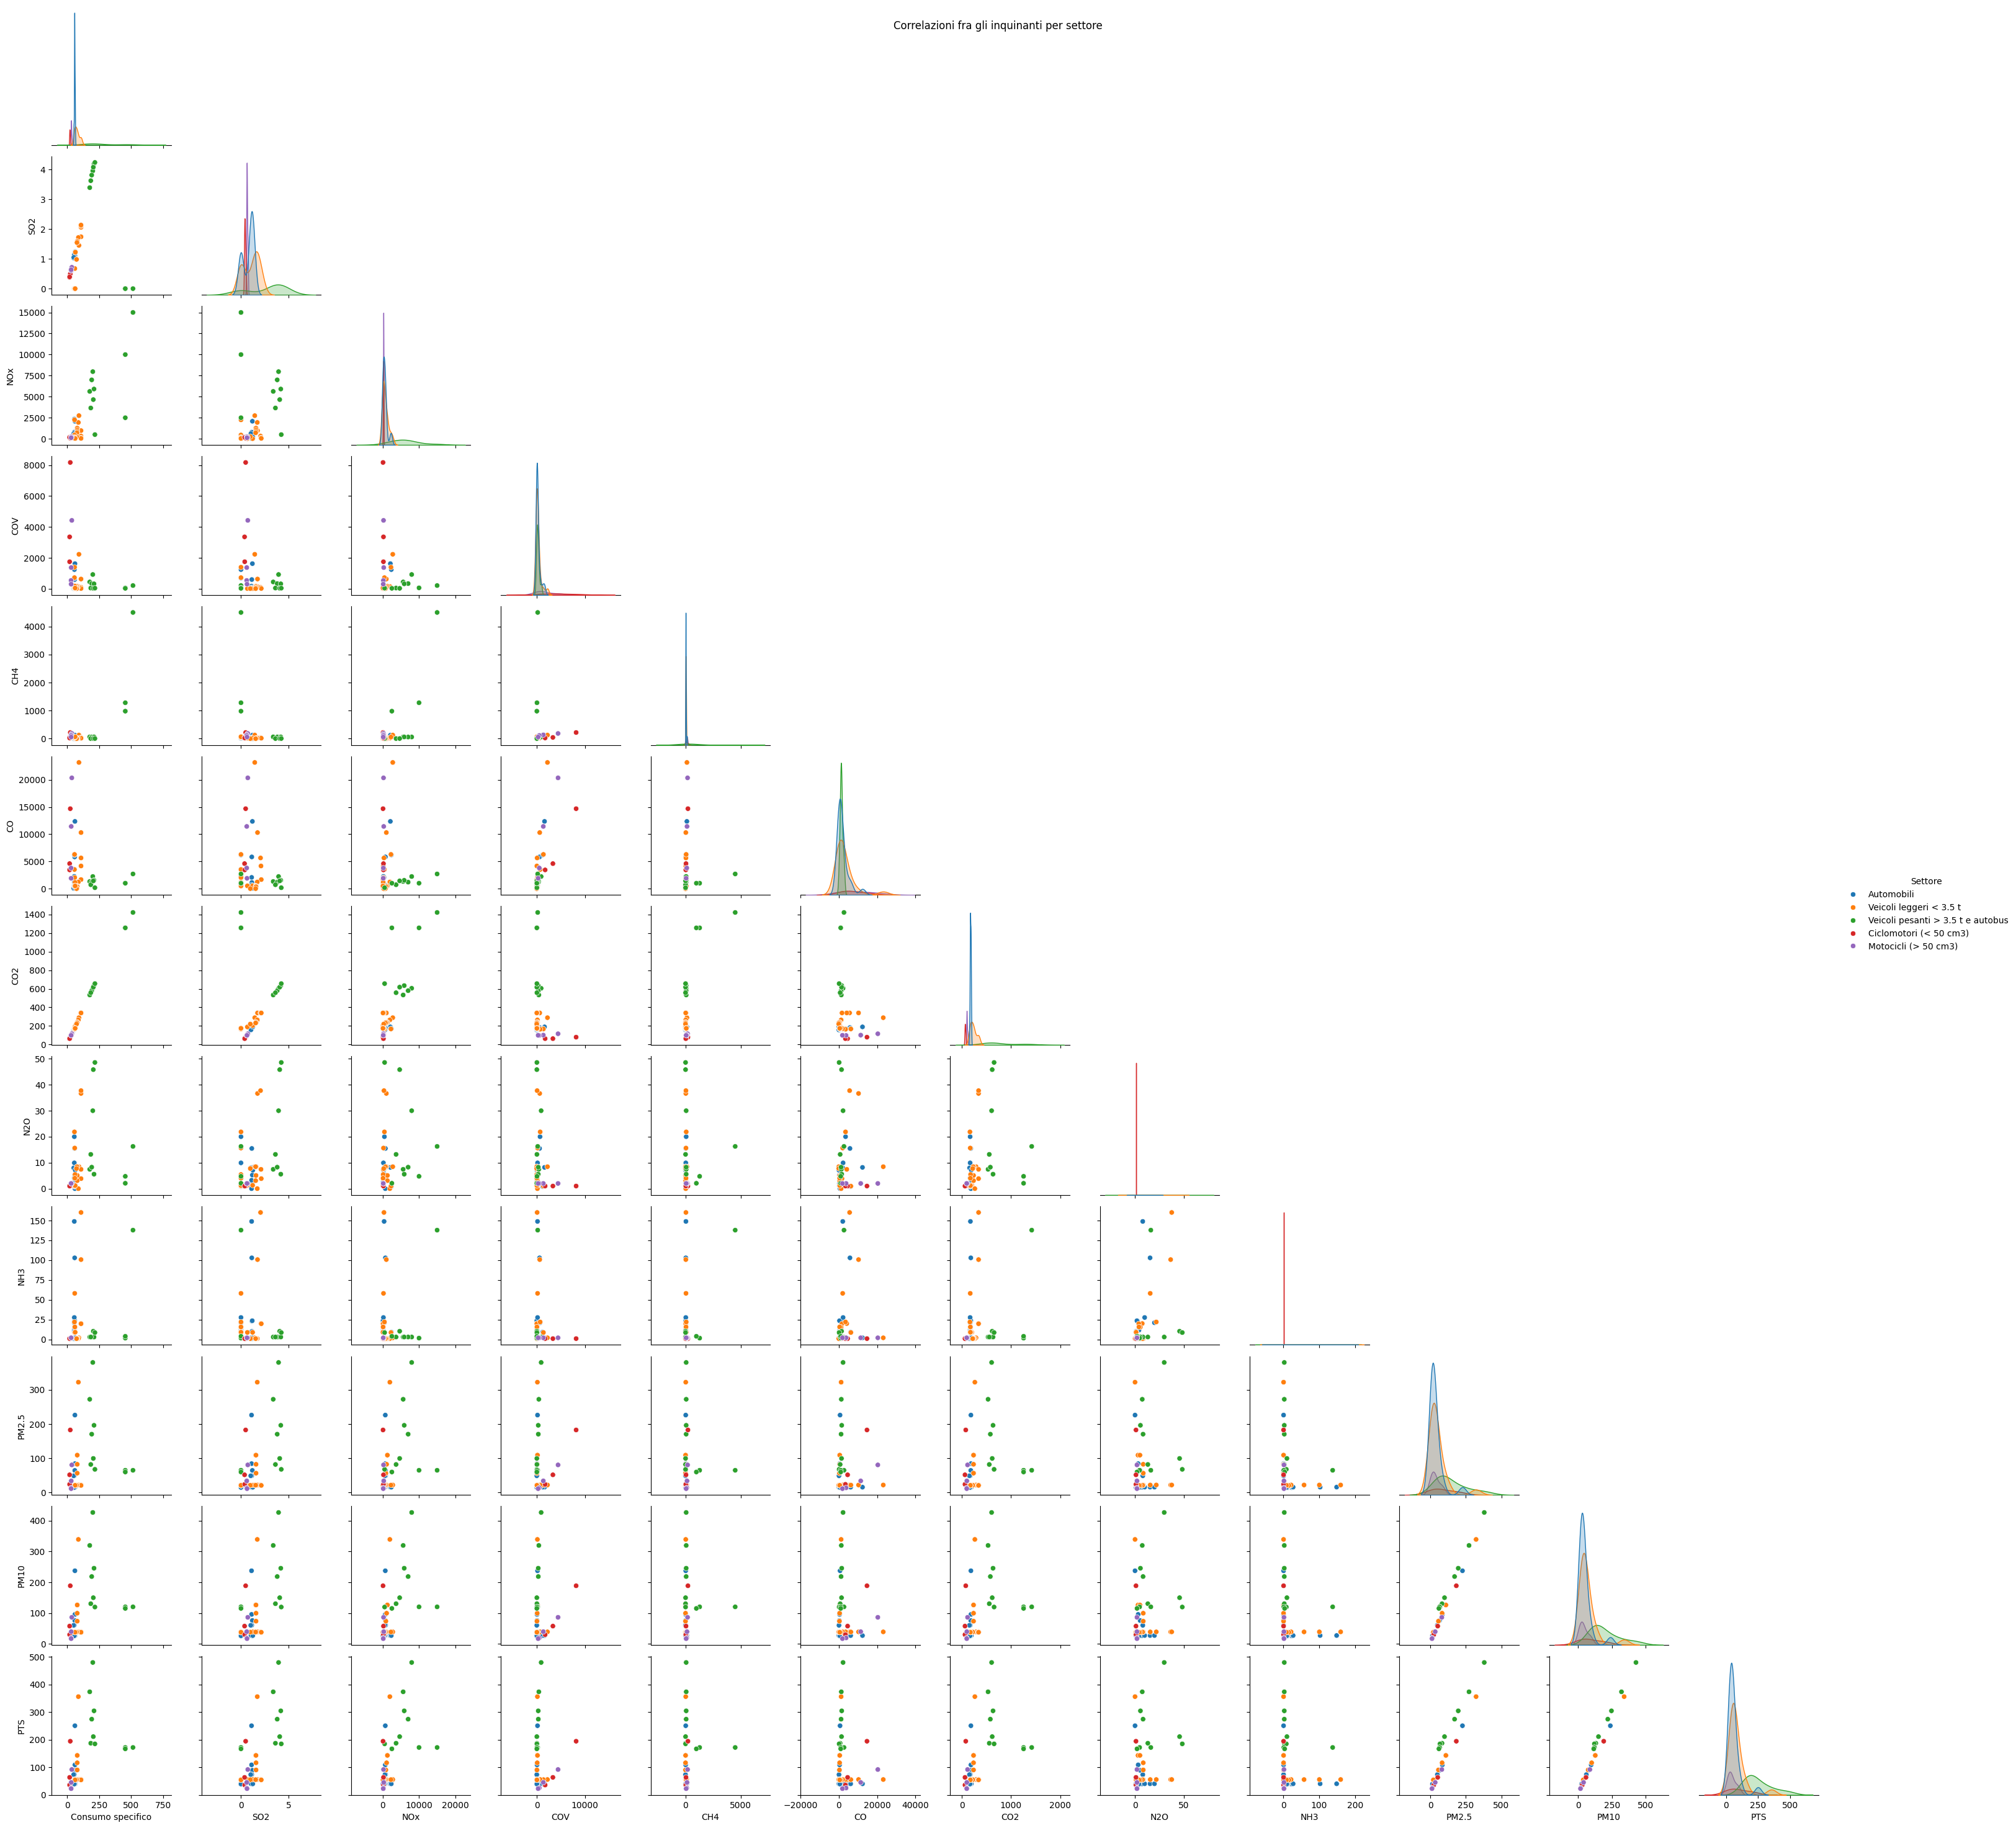

In [13]:
#creo un pairplot per esaminare le correlazioni fra tutti gli elementi del dataset
sns.pairplot(data_df, hue="Settore", height=2.5, corner=True, aspect=1)

#aggiungo un titolo al grafico totale
plt.suptitle("Correlazioni fra gli inquinanti per settore")

#visualizzo il pairplot.
plt.show()

<ipython-input-14-a0d159bd9326>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_df.corr()


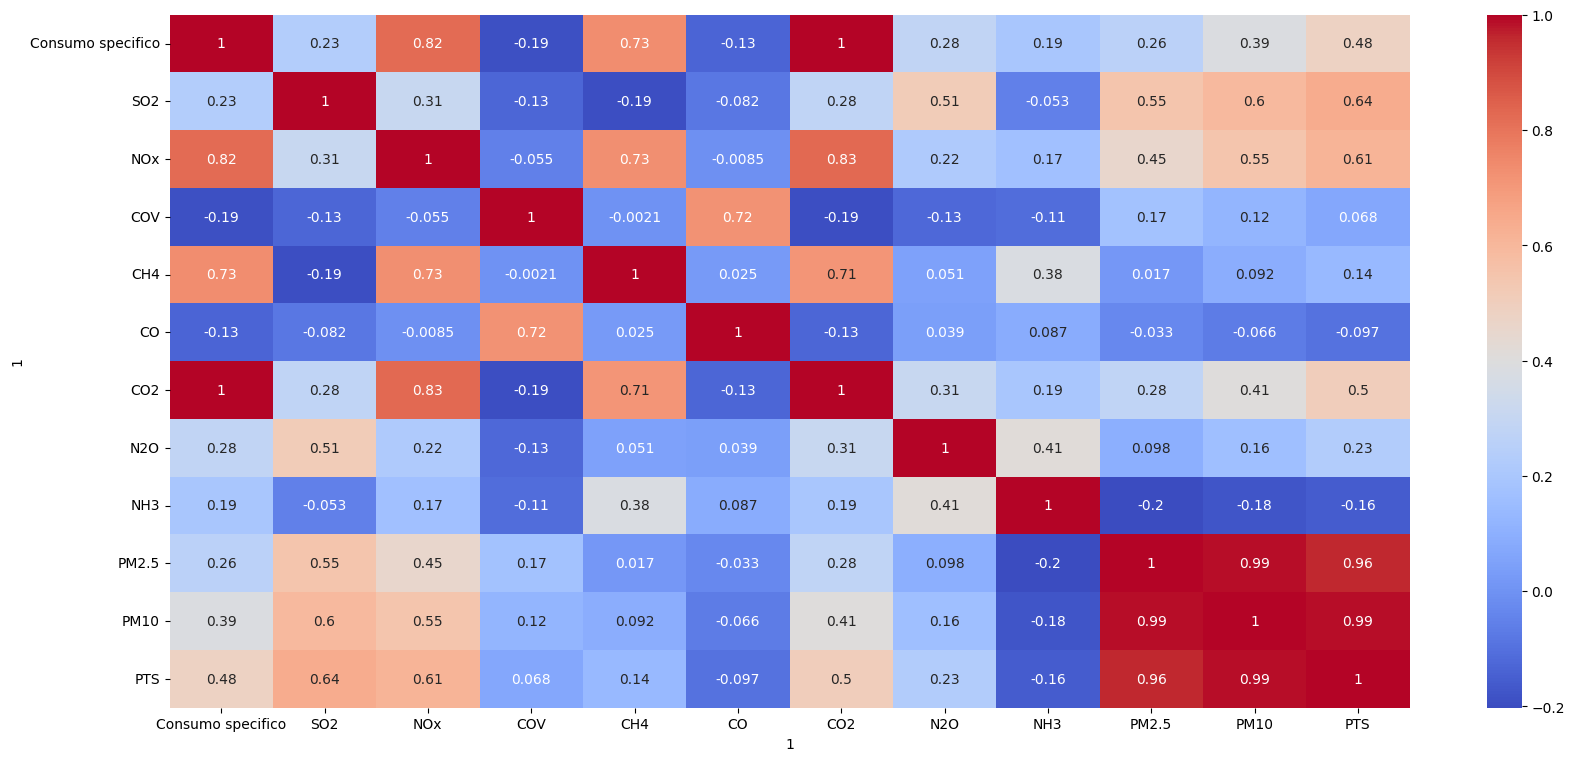

In [14]:
#calcolo la correlazione tra le colonne del dataset
correlation_matrix = data_df.corr()

#creo una heatmap per vedere le correlazioni(da -1 a +1, più ti avvicini a 1 più c'è correlazione)
plt.figure(figsize=(20, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

#visualizzo l'heatmap
plt.show()

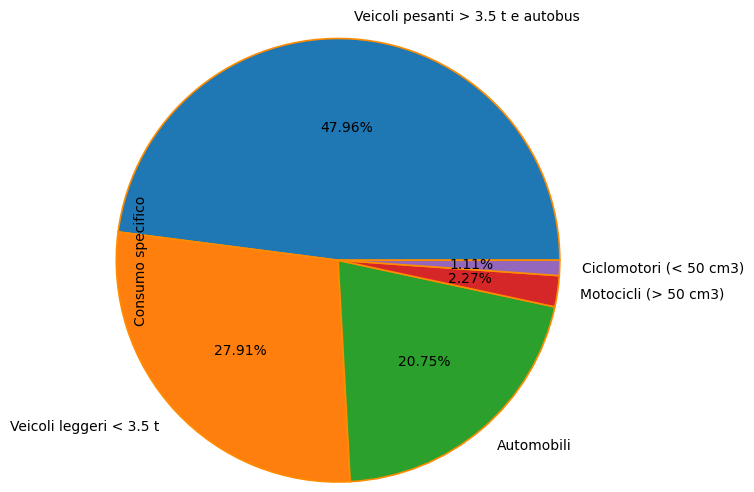

<Figure size 400x400 with 0 Axes>

In [15]:
#copio il dataset
df2 = data_df.copy()

#raggruppo in base alla colonna 'Settore' e sommo i valori del consumo specifico
#i primi 5 settori con il consumo specifico più alto vengono selezionati e visualizzati in un grafico a torta.
df2.groupby(by=df2["Settore"])["Consumo specifico"].sum().sort_values(ascending=False)[:5].plot(
    kind="pie",
    autopct="%1.2f%%",
    radius=1.5,
    wedgeprops={'linewidth': 1.2, 'edgecolor': 'darkorange'}
)

#specifico le dimensioni del grafico
plt.figure(figsize=(4, 4))

#visualizzo il grafico
plt.show()

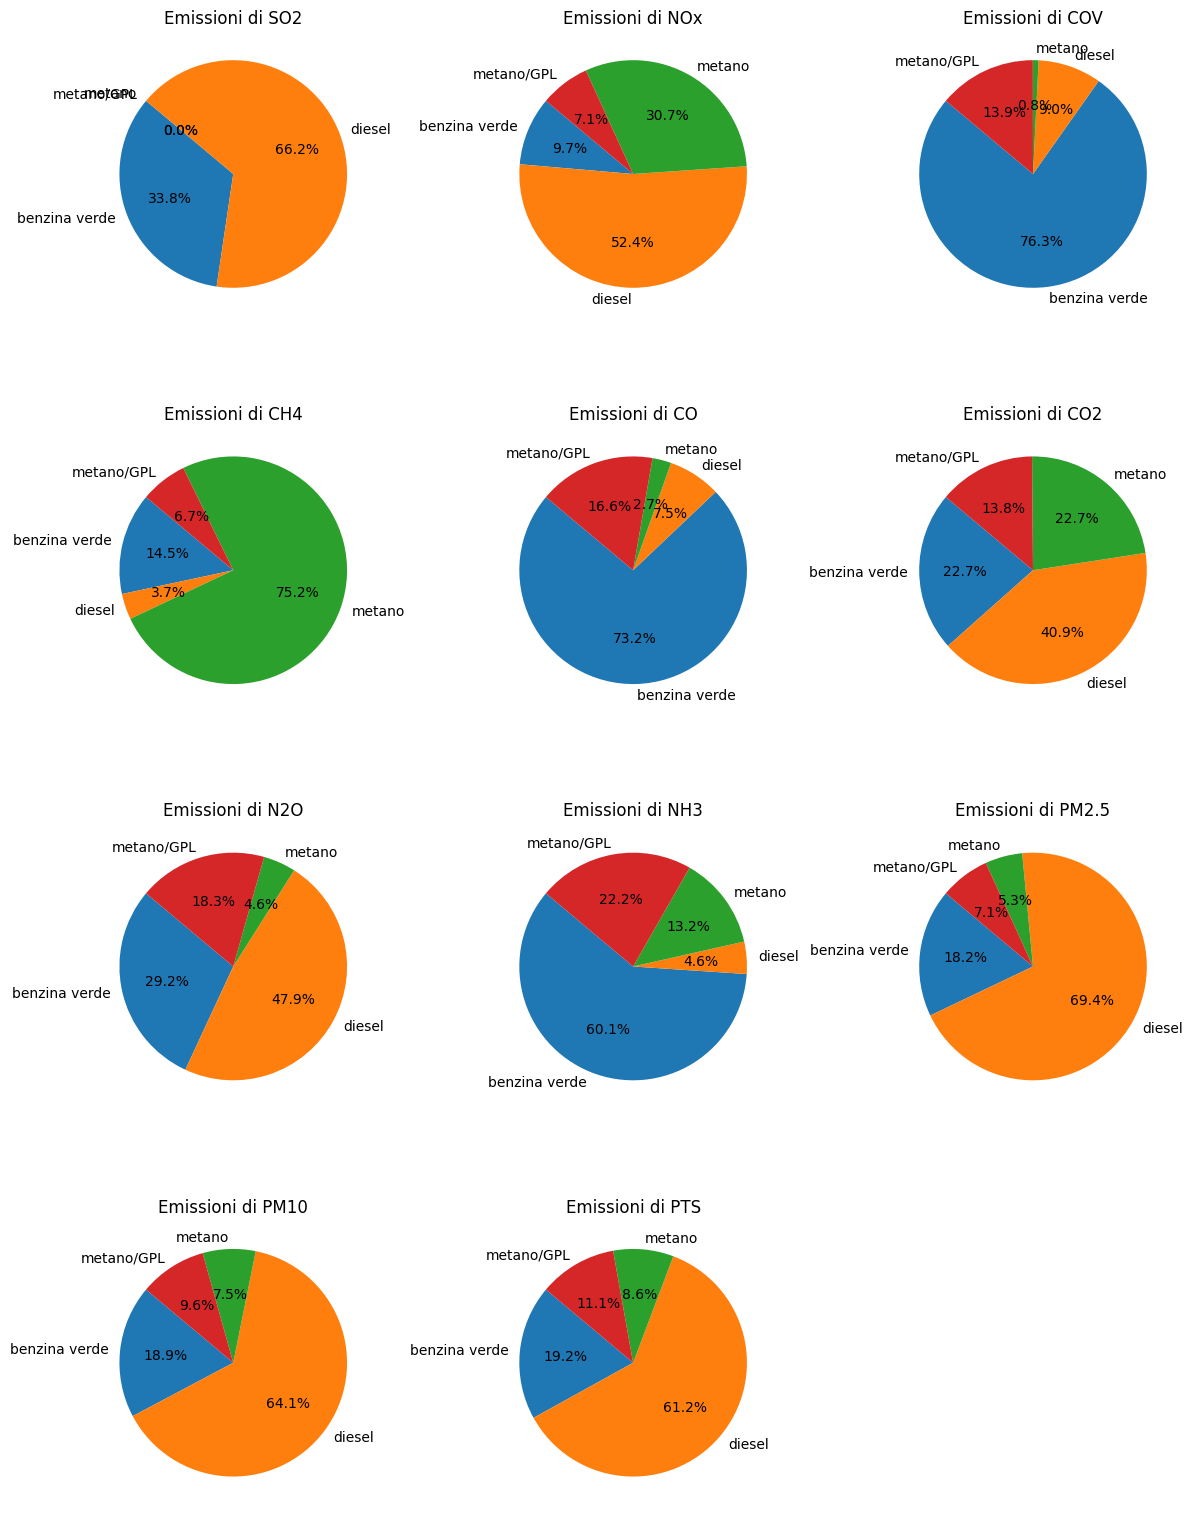

In [16]:
#elenco degli inquinanti
inquinanti = header[5:] #['SO2', 'NOx', 'COV', 'CH4', 'CO', 'CO2', 'N2O', 'NH3', 'PM2.5', 'PM10', 'PTS']

n = len(inquinanti)#calcolo del numero totale di inquinanti
ncols = 3#numero di colonne per riga nel grafico
#calcolo righe necessarie per organizzare gli inquinanti nel grafico
#garantendo che ci sia almeno una colonna per ogni inquinante.
nrows = n // ncols if n % ncols == 0 else n // ncols + 1

#creo un grafico con numero di celle in base al numero di inquinanti
fig, axs = plt.subplots(nrows, ncols, figsize=(ncols*4, nrows*4))

#creo un grafico a torta per ciascun inquinante
for ax, inquinante in zip(np.ravel(axs), inquinanti):
    #calcolo la somma totale dell'inquinante per ogni tipo di combustibile
    somme_combustibili = df2.groupby('Combustibile')[inquinante].sum()

    #creo il grafico a torta con etichette, percentuali e angolo di inizio specificato
    ax.pie(somme_combustibili, labels=somme_combustibili.index, autopct='%1.1f%%', startangle=140)
    #assegno al grafico il nome corretto con l'inquinante corrispondente
    ax.set_title(f'Emissioni di {inquinante}')

#rimuovo assi vuoti per evitare il plotting di grafici vuoti
for ax in np.ravel(axs)[len(inquinanti):]:
    fig.delaxes(ax)

#rimuovo sovrapposizioni
plt.tight_layout()

#visualizzo il grafico con i grafici a torta
plt.show()

---
FASE 2 - Machine Learning
----
---

In [17]:
#creo un nuovo dataset con solo le colonne specificate
data_prev = data_df[['Settore', 'Combustibile', 'Consumo specifico']]

In [18]:
#codifico le variabili categoriche 'Settore' e 'Combustibile' utilizzando LabelEncoder per renderle valori numerici
label_encoder = LabelEncoder()
data_prev['Settore'] = label_encoder.fit_transform(data_prev['Settore'])
data_prev['Combustibile'] = label_encoder.fit_transform(data_prev['Combustibile'])

#divido il dataset in variabili indipendenti (X) e variabile dipendente (y)
#X = input per il modello di machine learning
#y = output o variabile target del modello di machine learning.
X = data_prev[['Combustibile', 'Consumo specifico']]
y = data_prev['Settore']

#suddivido il dataset in fase di addestramento(80% del dataset) e fase di test(20% del dataset)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-18-7b7c135bb427>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prev['Settore'] = label_encoder.fit_transform(data_prev['Settore'])
<ipython-input-18-7b7c135bb427>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prev['Combustibile'] = label_encoder.fit_transform(data_prev['Combustibile'])


In [19]:
#creo e addestro il modello KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=3) #2-4 sweet spot
knn_classifier.fit(X_train, y_train)

#effettuo le previsioni
y_pred_knn = knn_classifier.predict(X_test)

#valuto le prestazioni(accuracy_score)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy KNeighborsClassifier: {accuracy_knn}')

Accuracy KNeighborsClassifier: 0.9166666666666666


In [20]:
#creo e addestro il modello SVM (Support Vector Machine)
svm_classifier = SVC(kernel='linear', C=1.0) #linear performa meglio
svm_classifier.fit(X_train, y_train)

#effettuo le previsioni
y_pred_svm = svm_classifier.predict(X_test)

#valuto le prestazioni(accuracy_score)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy SVM: {accuracy_svm}')

Accuracy SVM: 0.9166666666666666


In [21]:
#valutazione KNeighborsClassifier
print("KNeighborsClassifier:")
print(classification_report(y_test, y_pred_knn))

# Valutazione SVM
print("SVM:")
print(classification_report(y_test, y_pred_svm))

KNeighborsClassifier:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         3

    accuracy                           0.92        12
   macro avg       0.93      0.96      0.94        12
weighted avg       0.94      0.92      0.92        12

SVM:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         3

    accuracy                           0.92        12
   macro avg       0.93      0.96      0.94        12
weighted avg       0.94      0.92      0.92       

In [22]:
# Creazione di un dizionario di mapping
mappa_settori = {
    0: "Automobili",
    1: "Veicoli leggeri < 3.5 t",
    2: "Veicoli pesanti > 3.5 t e autobus",
    3: "Ciclomotori (< 50 cm3)",
    4: "Motocicli (> 50 cm3)",
}

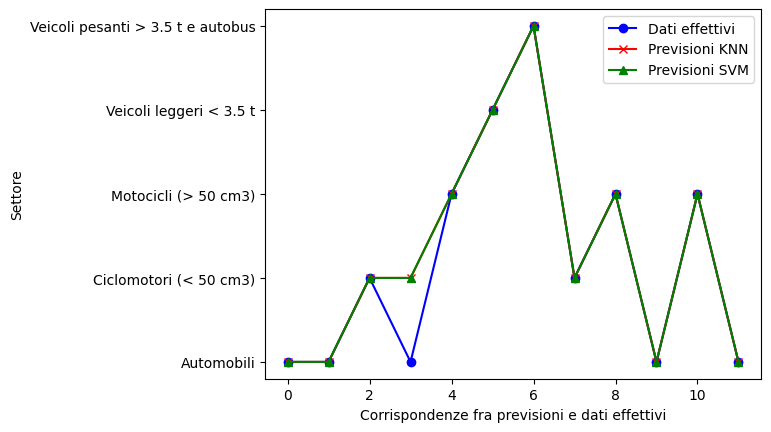

In [23]:
#plot dei dati effettivi (dati reali)
plt.plot([mappa_settori[val] for val in y_test.values], label='Dati effettivi', color='blue', marker='o')

#plot delle previsioni KNeighborsClassifier
plt.plot([mappa_settori[val] for val in y_pred_knn], label='Previsioni KNN', color='red', marker='x')

#plot delle previsioni SVM
plt.plot([mappa_settori[val] for val in y_pred_svm], label='Previsioni SVM', color='green', marker='^')

#aggiunta dei nomi agli assi
plt.xlabel('Corrispondenze fra previsioni e dati effettivi')
plt.ylabel('Settore')

#aggiunta di una legenda
plt.legend()

#visualizzazione del grafico
plt.show()

---
FASE 3 - Rete Neurale
---
---

In [24]:
#copio il dataset --> devo pulire la colonna "tipo legislativo"
df3 = data_df.copy()

#funzione per tagliare le stringhe quando incontro "-" e prendere solo la parte che lo precede
def taglia_alla_barra(stringa):
    if ' - ' in stringa:
        return stringa.split(' - ')[0]
    else:
        return stringa

#funzione per sostituire i valori anomali con valori conformi al resto del dataset
def sostituisci(stringa):
    if stringa == 'Conventional':
        return 'Euro 0'
    elif stringa == 'EEV':
        return 'Euro 5'
    elif stringa == 'Euro I':
        return 'Euro 1'
    elif stringa == 'Euro II':
        return 'Euro 2'
    elif stringa == 'Euro III':
        return 'Euro 3'
    elif stringa == 'Euro IV':
        return 'Euro 4'
    elif stringa == 'Euro V':
        return 'Euro 5'
    elif stringa == 'Euro VI':
        return 'Euro 6'
    return stringa

#applico le funzioni alla colonna "tipo legislativo"
df3['Tipo legislativo'] = df3['Tipo legislativo'].apply(taglia_alla_barra).apply(sostituisci)

In [25]:
#cancello la colonna "periodo" perchè ha la stessa valenza della colonna "tipo legislativo" in questa analisi
df3 = df3.drop('Periodo', axis=1)

In [26]:
#controllo che effettivamente sia stata rimossa la colonna "periodo"
df3.columns

Index(['Settore', 'Combustibile', 'Tipo legislativo', 'Consumo specifico',
       'SO2', 'NOx', 'COV', 'CH4', 'CO', 'CO2', 'N2O', 'NH3', 'PM2.5', 'PM10',
       'PTS'],
      dtype='object', name=1)

In [27]:
#creo una copia del dataset
data_prev2 = df3.copy()

In [28]:
#preparazione dati per previsione
#codifico le variabili "Settore", "Combustibile" e "Tipo legislativo" utilizzando LabelEncoder come in precedenza
data_prev2['Settore'] = label_encoder.fit_transform(data_prev2['Settore'])
data_prev2['Combustibile'] = label_encoder.fit_transform(data_prev2['Combustibile'])
data_prev2['Tipo legislativo'] = label_encoder.fit_transform(data_prev2['Tipo legislativo'])

#divido il dataset in variabili indipendente (X) e variabile dipendente (y) per la previsione del PM10
y = data_prev2['PM10']
X_train, X_test, y_train, y_test = train_test_split(data_prev2, y, test_size=0.2, random_state=42)

In [44]:
#inizializzo uno StandardScaler per standardizzare le features numeriche
sc = StandardScaler()
#standardizzo le features nei set di addestramento e di test (avg = 0, std dev = 1)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#verifica se sono presenti dei valori nulli contadoli
data_prev2.isnull().sum()

1
Settore              0
Combustibile         0
Tipo legislativo     0
Consumo specifico    0
SO2                  0
NOx                  0
COV                  0
CH4                  0
CO                   0
CO2                  0
N2O                  0
NH3                  0
PM2.5                0
PM10                 0
PTS                  0
dtype: int64

In [45]:
#guardo quante righe(primo valore dei 2) e quante colonne ha il mio dataset
data_prev2.shape

(59, 15)

In [46]:
#creo un modello sequenziale --> più specificatamente una regressione lineare(activation = linear)
#utilizzando una rete neurale basata su nodi densi --> nodo denso = nodo in cui ogni neurone è connesso al neurone successivo
modello = Sequential()
#aggiungo alla mia rete neurale uno strato denso con 64 neuroni, input_dim rappresenta il numero di colonne in input
modello.add(Dense(128, input_dim=15, activation='relu'))
modello.add(Dense(64, activation='relu'))
modello.add(Dense(32, activation='relu'))
modello.add(Dense(16, activation='relu'))
#aggiungo alla mia rete neurale un ultimo strato denso con 1 neurone per avere output lineare
modello.add(Dense(1, activation='linear'))  #l'output è la mia previsione del PM10

In [47]:
#dimensioni del set di addestramento
X_train.shape
#dimensioni del set di test
X_test.shape

(12, 15)

In [52]:
#specifico l'ottimizzatore e la funzione di perdita
modello.compile(optimizer='adam', loss='mean_squared_error')
# Addestra il modello sui dati di addestramento per un numero x di epoche
modello.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose= 1)

Epoch 1/100
2/2 [==============================] - 2s 299ms/step - loss: 1.3973 - val_loss: 631.5876
Epoch 2/100
2/2 [==============================] - 0s 96ms/step - loss: 2.9097 - val_loss: 508.3407
Epoch 3/100
2/2 [==============================] - 0s 89ms/step - loss: 5.6582 - val_loss: 553.6147
Epoch 4/100
2/2 [==============================] - 0s 124ms/step - loss: 2.8682 - val_loss: 572.7232
Epoch 5/100
2/2 [==============================] - 0s 176ms/step - loss: 0.7516 - val_loss: 571.9805
Epoch 6/100
2/2 [==============================] - 0s 105ms/step - loss: 2.3878 - val_loss: 610.9939
Epoch 7/100
2/2 [==============================] - 0s 136ms/step - loss: 0.7316 - val_loss: 623.7833
Epoch 8/100
2/2 [==============================] - 0s 116ms/step - loss: 1.4723 - val_loss: 582.6941
Epoch 9/100
2/2 [==============================] - 0s 47ms/step - loss: 0.3012 - val_loss: 539.8886
Epoch 10/100
2/2 [==============================] - 0s 65ms/step - loss: 1.4199 - val_loss: 54

In [53]:
#uso il modello appena addestrato per fare previsioni del pm10 sui dati di test
y_prev=modello.predict(X_test)
#stampo le previsioni
y_prev

1/1 [==============================] - 0s 69ms/step


array([[ 34.317665],
       [ 28.469545],
       [ 37.734974],
       [ 29.77001 ],
       [240.89156 ],
       [ 66.108925],
       [ 15.464986],
       [ 41.022163],
       [137.10487 ],
       [ 31.351858],
       [201.05968 ],
       [ 26.342215]], dtype=float32)

In [54]:
#calcolo l'errore quadratico medio (mean squared error) sui dati di test
loss = modello.evaluate(X_test, y_test)
#stampo l'errore quadratico medio
print(f'Errore quadratico medio: {loss}')

1/1 [==============================] - 0s 24ms/step - loss: 574.2103
Errore quadratico medio: 574.2102661132812


Text(0, 0.5, 'PM10')

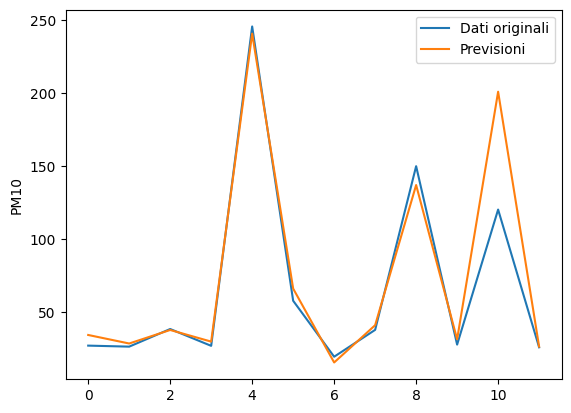

In [55]:
#utilizzo gli indici degli elementi come elementi di riferimento per l'asse x
x_values = range(len(y_test))

#plot dei dati originali
plt.plot(x_values, y_test, label='Dati originali')

#plot delle previsioni
plt.plot(x_values, y_prev, label='Previsioni')

#aggiungo una legenda
plt.legend()

#aggiungo un etichetta all'asse delle y
plt.ylabel('PM10')

---
FASE 4 - Valutazione modelli / Meta Learning
---
---

In [37]:
#elenco dei modelli di regressione che verrano poi confrontati l'un l'altro per trovare il migliore per questo tipo di dataset
models = [
    MLPRegressor(),
    XGBRegressor(),
    LinearRegression(),
    RandomForestRegressor(),
    KNeighborsRegressor()
]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor                  : R2_score: 0.14532781128983274, RMSE:  61.910734
XGBRegressor                  : R2_score: 0.9920609952109929, RMSE:   5.966906
LinearRegression              : R2_score:               1.0, RMSE:        0.0
RandomForestRegressor         : R2_score: 0.9912515600272948, RMSE:   6.263708
KNeighborsRegressor           : R2_score: 0.8819334405209424, RMSE:  23.010689


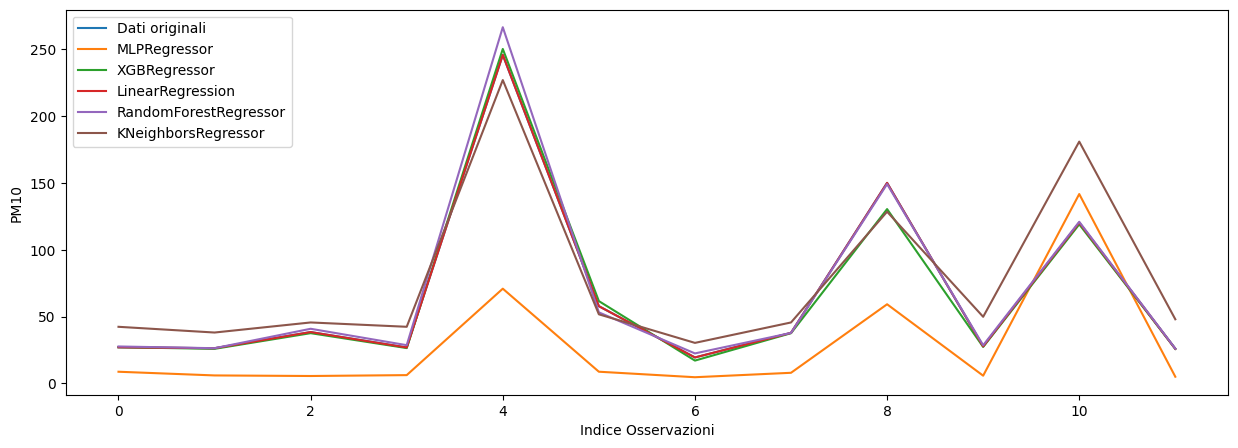

--------------------------------------------------------------------------------------------
LinearRegression              : R2_score: 1.0, RMSE:        0.0


In [38]:
#variabili per trovare il miglior modello di regressione
best_model = None
best_score = None
best_loss = None

#creazione di un unico grafico fuori dal ciclo che racchiuderà tutti gli andamenti dei modelli sopra elencati
plt.figure(figsize=(15, 5))
#plot dei dati originali
plt.plot(x_values, y_test, label='Dati originali')

#ciclo per addestrare e valutare tutti i modelli di regressione
base_predictions = []
for clf in models:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    base_predictions.append(y_pred.flatten()) #tengo da parte la lista delle previsioni per il meta learning

    #calcolo delle metriche di valutazione (R2_score e RMSE)
    #R2_score = quanto bene il modello spiega la variazione dei dati rispetto alla media(da 0 a 1 --> 1 = perfezione)
    #RMSE = radice del quadrato della media degli errori tra il modello e i valori effettivi(più è basso più è preciso)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f"{clf.__class__.__name__:30}: R2_score: {r2:17}, RMSE: {round(rmse, 6):10}")

    #plot delle previsioni sullo stesso grafico
    plt.plot(x_values, y_pred, label=f'{clf.__class__.__name__}')

    #aggiorno il miglior modello se necessario
    if best_loss is not None:
        if best_loss > rmse:
            best_model = clf
            best_score = r2
            best_loss = rmse
    else:
        best_model = clf
        best_score = r2
        best_loss = rmse

#assegno un etichetta all'asse delle x
plt.xlabel('Indice Osservazioni')
#assegno un etichetta all'asse delle y
plt.ylabel('PM10')
#aggiungo una legenda
plt.legend()
#mostro il grafico
plt.show()

#stampo il modello di regressione che ha avuto il risultato migliore (R2_score più alto e RMSE più basso)
print("-" * 92)
print(f"{best_model.__class__.__name__:30}: R2_score: {best_score}, RMSE: {round(best_loss, 6):10}")

Epoch 1/100
1/1 [==============================] - 1s 959ms/step - loss: 7833.6309
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 7202.7812
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 6600.5396
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 6027.2085
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 5479.3984
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 4957.7520
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 4465.5972
Epoch 8/100
1/1 [==============================] - 0s 17ms/step - loss: 4000.4661
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 3564.1990
Epoch 10/100
1/1 [==============================] - 0s 18ms/step - loss: 3156.8684
Epoch 11/100
1/1 [==============================] - 0s 21ms/step - loss: 2778.2141
Epoch 12/100
1/1 [==============================] - 0s 19ms/step - loss: 2429.0693
Epoch 13/100

1/1 [==============================] - 0s 105ms/step


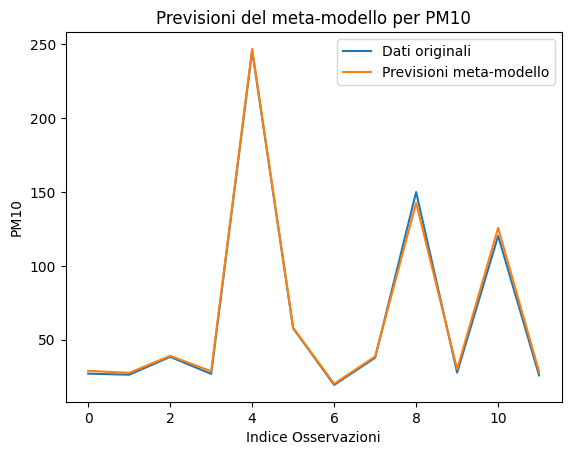

1/1 [==============================] - 0s 92ms/step - loss: 8.9503
Errore quadratico medio del meta-learner: 8.950346946716309


In [57]:
#creazione nuovo set di caratteristiche per il meta-learner
meta_features = np.array(base_predictions).T

#definizione del meta-learner (modello neurale per regressione)
meta_learner = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(len(models),)),
    tf.keras.layers.Dense(1, activation='linear')  # Funzione di attivazione lineare per la regressione
])
meta_learner.compile(optimizer='adam', loss='mean_squared_error')  # Perdita di errore quadratico medio per la regressione

#addestramento del meta-learner
meta_learner.fit(meta_features, y_test, epochs=100, batch_size=32)

#utilizzo del meta-learner per fare previsioni
meta_predictions = meta_learner.predict(meta_features)

#plot dei dati originali
plt.plot(range(len(y_test)), y_test, label='Dati originali')

#plot delle previsioni del meta-modello
plt.plot(range(len(meta_predictions)), meta_predictions, label='Previsioni meta-modello')

plt.legend()
plt.xlabel('Indice Osservazioni')
plt.ylabel('PM10')
plt.title('Previsioni del meta-modello per PM10')

#mostra il grafico
plt.show()

#valutazione prestazioni del meta-learner
loss_meta = meta_learner.evaluate(meta_features, y_test)
print(f"Errore quadratico medio del meta-learner: {loss_meta}")